In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import pandas as pd

sns.set(style='whitegrid')

Ringkasan Dataset:


,Kelas,Jumlah Gambar,Persentase (%)
0,Anemic,2563,59.925181
1,Nonanemic,1714,40.074819


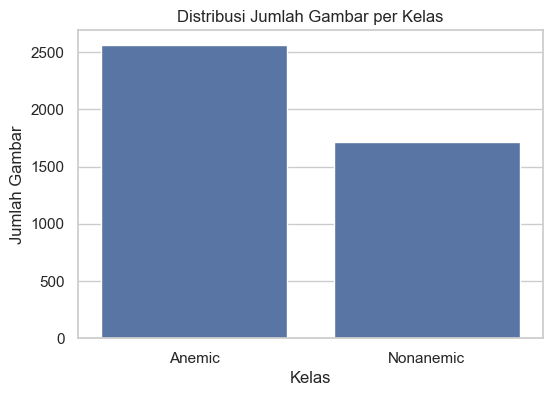

In [2]:
anemic_path = r"C:\Users\ARIEL\Documents\Kuliah\Semester.6\Praktikum Machine Learning\Mini-Project-kyun-oke\Mini-Project-kyun\Project-chan 2 (Image)\dataset\anemic"
nonanemic_path = r"C:\Users\ARIEL\Documents\Kuliah\Semester.6\Praktikum Machine Learning\Mini-Project-kyun-oke\Mini-Project-kyun\Project-chan 2 (Image)\dataset\nonanemic"

n_anemic = len([f for f in os.listdir(anemic_path) if f.lower().endswith((".jpg", ".jpeg", ".png"))])
n_nonanemic = len([f for f in os.listdir(nonanemic_path) if f.lower().endswith((".jpg", ".jpeg", ".png"))])

df_summary = pd.DataFrame({
    'Kelas': ['Anemic', 'Nonanemic'],
    'Jumlah Gambar': [n_anemic, n_nonanemic],
    'Persentase (%)': [n_anemic / (n_anemic + n_nonanemic) * 100,
                       n_nonanemic / (n_anemic + n_nonanemic) * 100]
})
print("Ringkasan Dataset:")
display(df_summary)

plt.figure(figsize=(6, 4))
sns.barplot(x='Kelas', y='Jumlah Gambar', data=df_summary)
plt.title("Distribusi Jumlah Gambar per Kelas")
plt.ylabel("Jumlah Gambar")
plt.xlabel("Kelas")
plt.show()

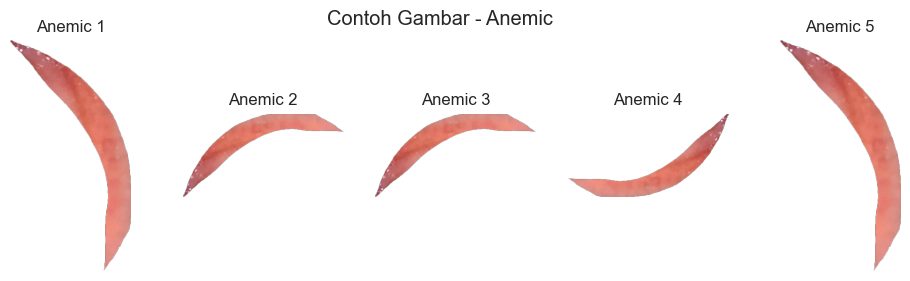

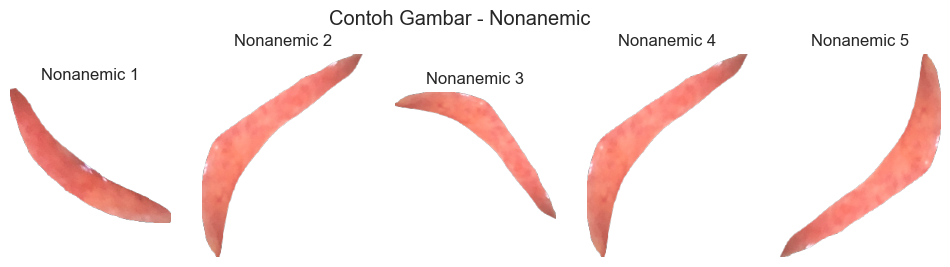

In [3]:
def show_sample_images(folder, title):
    plt.figure(figsize=(12, 3))
    for idx, filename in enumerate(os.listdir(folder)[:5]):
        img_path = os.path.join(folder, filename)
        img = Image.open(img_path)
        plt.subplot(1, 5, idx+1)
        plt.imshow(img)
        plt.title(f"{title} {idx+1}")
        plt.axis('off')
    plt.suptitle(f"Contoh Gambar - {title}")
    plt.show()

show_sample_images(anemic_path, "Anemic")
show_sample_images(nonanemic_path, "Nonanemic")

In [ ]:
IMG_SIZE = (64, 64)

def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if filename.lower().endswith((".jpg", ".jpeg", ".png")):
            img_path = os.path.join(folder, filename)
            img = Image.open(img_path).resize(IMG_SIZE).convert('L')
            img_array = np.array(img).flatten() / 255.0 
            images.append(img_array)
            labels.append(label)
    return images, labels

anemic_images, anemic_labels = load_images_from_folder(anemic_path, 1)
nonanemic_images, nonanemic_labels = load_images_from_folder(nonanemic_path, 0)

X = np.array(anemic_images + nonanemic_images)
y = np.array(anemic_labels + nonanemic_labels)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [6]:
y_pred = knn.predict(X_test)

print(f" Akurasi Model KNN: {accuracy_score(y_test, y_pred):.2f}")

print("\n Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Nonanemic", "Anemic"]))

 Akurasi Model KNN: 0.75

 Classification Report:
              precision    recall  f1-score   support

   Nonanemic       0.72      0.63      0.67       343
      Anemic       0.77      0.83      0.80       513

    accuracy                           0.75       856
   macro avg       0.74      0.73      0.74       856
weighted avg       0.75      0.75      0.75       856



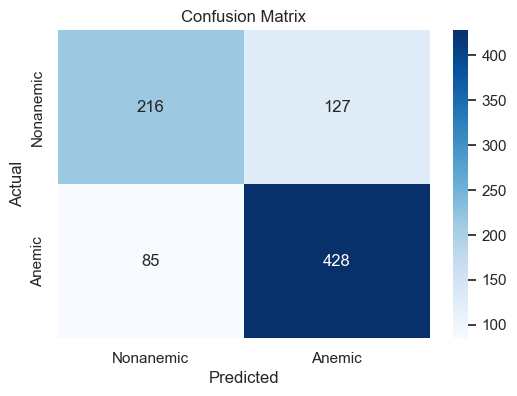

In [7]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Nonanemic', 'Anemic'],
            yticklabels=['Nonanemic', 'Anemic'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


https://github.com/arielyosua/miniprojectML/tree/main